In [2]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/Users/prateek/Desktop/mantanence/ai4i2020.csv')

# Display the first few rows of the dataset
print(df.head())


   UDI Product ID Type  Air temperature [K]  Process temperature [K]  \
0    1     M14860    M                298.1                    308.6   
1    2     L47181    L                298.2                    308.7   
2    3     L47182    L                298.1                    308.5   
3    4     L47183    L                298.2                    308.6   
4    5     L47184    L                298.2                    308.7   

   Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Machine failure  TWF  \
0                    1551         42.8                0                0    0   
1                    1408         46.3                3                0    0   
2                    1498         49.4                5                0    0   
3                    1433         39.5                7                0    0   
4                    1408         40.0                9                0    0   

   HDF  PWF  OSF  RNF  
0    0    0    0    0  
1    0    0    0    0  
2    0  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Machine failure          10000 non-null  int64  
 9   TWF                      10000 non-null  int64  
 10  HDF                      10000 non-null  int64  
 11  PWF                      10000 non-null  int64  
 12  OSF                      10000 non-null  int64  
 13  RNF                      10000 non-null  int64  
dtypes: float64(3), int64(9)

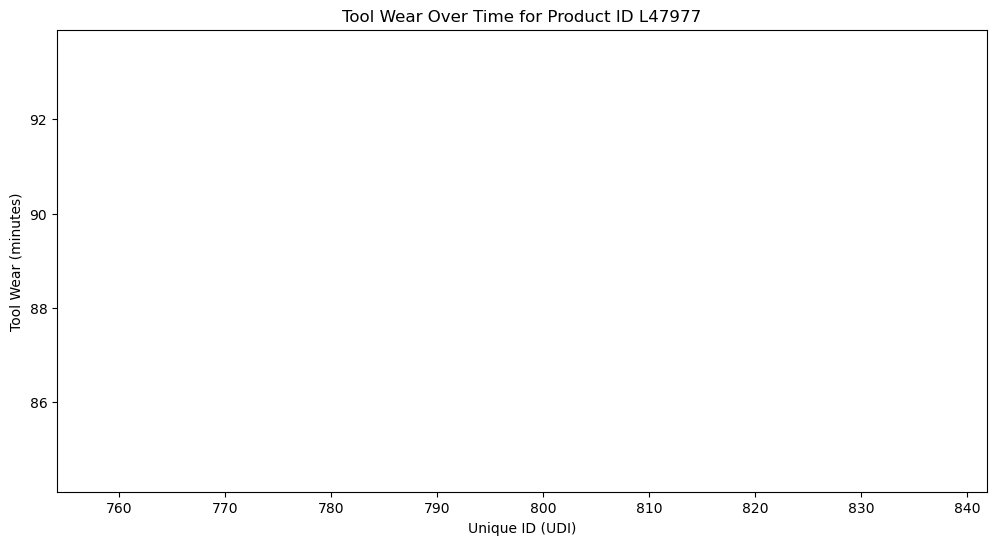

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Check column names and data types
print(df.info())

# Visualize tool wear over time for a sample product
sample_product_id = df['Product ID'].sample().iloc[0]

plt.figure(figsize=(12, 6))
sns.lineplot(x='UDI', y='Tool wear [min]', data=df[df['Product ID'] == sample_product_id])
plt.xlabel('Unique ID (UDI)')
plt.ylabel('Tool Wear (minutes)')
plt.title(f'Tool Wear Over Time for Product ID {sample_product_id}')
plt.show()


In [5]:
 #Assume 'Target' column indicates whether a failure occurred (1) or not (0)
df['target'] = df['Machine failure']

# Select features and target variable
features = ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']
target = 'target'

X = df[features]
y = df[target]


In [7]:
import joblib
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the model
model = RandomForestClassifier()
model.fit(X_train, y_train)
joblib.dump(model, 'your_model.pkl')

# Make predictions
predictions = model.predict(X_test)

# Evaluate the model
print(f'Accuracy: {accuracy_score(y_test, predictions)}')
print('Classification Report:\n', classification_report(y_test, predictions))

Accuracy: 0.983
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      1939
           1       0.81      0.57      0.67        61

    accuracy                           0.98      2000
   macro avg       0.90      0.78      0.83      2000
weighted avg       0.98      0.98      0.98      2000

